# Project: Wrangle and Analyze Data: @WeRateDogs
by Cyril odoi

In [3]:
#import required library packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import json
from json import loads
import requests
import tweepy
import tweepy.errors

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
os.chdir( '/Users/Sir/ALX Data Analyst/' )

In [5]:
os.getcwd()

'/Users/sir/ALX Data Analyst'

In [6]:
#convert the given csv file to a dataframe
archives = pd.read_csv('twitter_archive_enhanced.csv',sep=',')

In [8]:
archives.to_csv('archives.csv')


In [9]:
#confirm the csv file was loaded correctly
archives.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [10]:
#use requests library to download tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [13]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#read image tsv file csv dataframe
image = pd.read_csv('image-predictions.tsv', sep='\t')
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
image.to_csv('image.csv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [16]:
#apply tweepy library and twitter api credentials
api_key = 'Redacted'
api_secret_key='Redacted'
access_token = 'Redacted'
access_secret_token='Redacted'

#client = tweepy.Client(api_key, api_secret_key)
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_secret_token)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [17]:
#exclude retweets data as per the instructions
tweets = api.user_timeline(screen_name = 'dog_rates',
include_rts = False,
tweet_mode = 'extended')

In [18]:
for info in tweets[:]:
    print('ID {}'.format(info.id))
    print('Date: {}'.format(info.created_at))
    print(info.full_text)
    print('\n')

ID 1578419229795172357
Date: 2022-10-07 16:17:24+00:00
@Dee_sguise his new arch nemesis


ID 1578419132508299266
Date: 2022-10-07 16:17:01+00:00
@RissRiss24 alert the media


ID 1578419060240523265
Date: 2022-10-07 16:16:44+00:00
@peakingsassy PUPPY GAZE


ID 1578417367872581632
Date: 2022-10-07 16:10:00+00:00
Accidents happen. Tobi asks that you please consider getting @Trupanion so you never have to send us a GoFundMe. Click the link below to get a quote. It’s best to be puppared ❤️ #partner

https://t.co/vUNBJ3ianu https://t.co/EuhcjELPOZ


ID 1578417361228812288
Date: 2022-10-07 16:09:59+00:00
This is Tobi. He was pretending to be a superhero when he leapt from his human's bed in an attempt to fly. Broke his leg upon landing and needed surgery so it can heal properly. We paid for the remainder of his care, and he's still a superhero to us. 13/10 https://t.co/OakmqJjE6l


ID 1578395662202331142
Date: 2022-10-07 14:43:45+00:00
@VeganGunStuff @15outof10 @austinhumane we're nuts about 

In [19]:
#identify total number of tweets in dataframe
tweet_ids = archives.tweet_id.values
len(tweet_ids)

2356

In [20]:
#get status of a tweet
status = api.get_status(1570432515994951680, tweet_mode = 'extended')
status

Status(_api=<tweepy.api.API object at 0x7fe216ade1c0>, _json={'created_at': 'Thu Sep 15 15:21:03 +0000 2022', 'id': 1570432515994951680, 'id_str': '1570432515994951680', 'full_text': '@JAPayne75 hi Daisy welcome home ❤️', 'truncated': False, 'display_text_range': [11, 35], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'JAPayne75', 'name': 'Jenifer with one N', 'id': 267347549, 'id_str': '267347549', 'indices': [0, 10]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1570245638595674112, 'in_reply_to_status_id_str': '1570245638595674112', 'in_reply_to_user_id': 267347549, 'in_reply_to_user_id_str': '267347549', 'in_reply_to_screen_name': 'JAPayne75', 'user': {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'all our links ➜', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ We

In [21]:
import time
import json

# Query Twitter's API for JSON data for the 2356 tweets ids
count = 0

# creating an error dictionary to record potential errors
error_dict = {}
start_time = time.time()

# Saving each tweet's returned JSON on a separate line and in a text file
with open('tweet_json.txt', 'w') as file:
   #give it some time for all tweets to generate
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            # Getting the status id of each tweet id
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # Converting each tweet status to a JSON object/string and saving to a file
            json.dump(tweet._json, file)
            file.write('\n')
        # Catching errors that occured 
        except tweepy.TweepyException:
            print("Fail")
            # Appending errors to error_dict
            error_dict[tweet_id] = 'fail'
            pass
end_time = time.time()
print(end_time - start_time)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Rate limit reached. Sleeping for: 757


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
11

Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
14

Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
16

Rate limit reached. Sleeping for: 766


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [22]:
len(error_dict)

30

In [23]:
#with an empty list write the tweets data from the json file into list
tweets=list()
with open ('tweet_json.txt', 'r') as f:
    for l in f.readlines():
 
            json_data = json.loads(l)
            tweet_id = json_data['id']
            rt_count = json_data['retweet_count']
            fav_count = json_data['favorite_count'] 
            tweets.append({
                "tweet_id" : tweet_id,
                "retweet_count" : int(rt_count),
                "fav_count": int(fav_count)})

tweets = pd.DataFrame(tweets, columns = ['tweet_id','retweet_count','fav_count'])    
tweets

,tweet_id,retweet_count,fav_count
0,892420643555336193,6952,33608
1,892177421306343426,5255,29148
2,891815181378084864,3461,21936
3,891689557279858688,7163,36665
4,891327558926688256,7700,35061
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,245
2323,666033412701032449,36,100
2324,666029285002620928,39,112


## Assessing Data

This is where we check the gathered data for tidiness and quality.

- Low quality data means the data is dirty
- Untidy data has structural issues which make analysis difficult and results are inaccurate



### a. Assess archives dataset

##### columns descriptions

. tweet_id - unique numeric code assigned to each tweet

.in_reply_to_status_id - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

.in_reply_to_user_id - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.

.timestamp - The date and time tweet was posted

.source - The source of the tweet

.text - Text portion of a tweet

.retweeted_status_id - This attribute contains a representation of the original Tweet that was retweeted.

.retweeted_status_user_id - The id of the retweeted status user

.retweeted_status_timestamp - This attribute contains a representation of the time the original Tweet was retweeted.

.expanded_urls - This is the url of the tweet

.rating_numerator - This is the numerator of the ratings for the dog by the @WeRateDogs profile

.rating_denominator - This is the denominator of the ratings for the dog - standard is 10

.name - This is the name of the dog

.doggo - This is a stage of the dog growth cycle

.floofer - This is a stage of the dog growth cycle

.pupper - This is a stage of the dog growth cycle

.puppo - This is a stage of the dog growth cycle

### Visually assess data

In [24]:
archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [25]:
#visually assess a random sample
archives.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1061,741303864243200000,NaN,NaN,2016-06-10 16:19:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Theodore. He just saw an adult wearing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741303864...,12,10,Theodore,None,None,None,None
1181,719332531645071360,NaN,NaN,2016-04-11 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,None,None,None,None
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Skittle. He's trying to communicate. 1...,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11,10,Skittle,None,None,None,None
1435,697259378236399616,NaN,NaN,2016-02-10 03:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,8,10,getting,None,None,None,None
1777,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,10,10,None,None,None,None,None


Programmatically assess data

In [26]:
#get a concise summary of archives dataframe
archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Archives dataframe contains 17 columns, 2356 rows and a mix of integer, float and string datatypes
- There are a lot of null values in the archives df which needs to be addressed

In [27]:
#get statistical info of the archives dataframe
archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
#check for duplicates
sum(archives.duplicated())

0

In [29]:
#check the value counts for each value of source column
archives.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [30]:
#identify rating denominator scores for the respective row data in the archives dataset 
archives.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

23 rows in the archives dataframe have 'rating denominator' values greater than or less than 10 (which should the standard)

In [31]:
#identify rows where rating_denominator column is not equal to 10
archives[['tweet_id','text','name','rating_denominator']].query('rating_denominator!=10')

,tweet_id,text,name,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,None,0
342,832088576586297345,@docmisterio account started on 11/15/15,None,15
433,820690176645140481,The floofs have been released I repeat the flo...,None,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,Sam,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",None,11
902,758467244762497024,Why does this never happen at my front door......,None,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",None,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,this,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,None,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,Bluebert,50


In [32]:
#identify rating numerator scores for the respective row data in the archives dataframe 
archives.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

We observe that quite a number of numerator ratings > 10, which is allowed for this dataset

### b. Assess image dataset

##### columns descriptions
.tweet_id - unique numeric code assigned to each tweet

.jpg_url - url link for the dog images

.img_num -	dog image num from 1-to-4 as per Twitter's image cap

.p1 - algorithm's #1 prediction for the image in the tweet 

.p1_conf - confidence level the algorithm is in its #1 prediction

.p1_dog - whether or not the #1 prediction is a breed of dog (True/False)

.p2 - confidence level the algorithm is in its #2 prediction

.p2_conf - how confident the algorithm is in its #2 prediction

.p2_dog - whether or not the #2 prediction is a breed of dog (True/False)

.p3 - confidence level the algorithm is in its #3 prediction

.p3_conf - how confident the algorithm is in its #3 prediction

.p3_dog - whether or not the #2 prediction is a breed of dog (True/False)

In [33]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [34]:
#get a concise summary of archives dataframe
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- image dataframe contains 2075 rows, 12 columns and a mix of integer, float and string data types
- no nulls recorded in the image df

In [35]:
#get statistically summary form the image df
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [36]:
#check for duplicates i image df
sum(image.duplicated())

0

### c. Assess tweets dataset
##### columns descriptions
- tweet_id - unique numeric code assigned to each tweet
- retweet_count - records the number of times a tweet was retweeted
- fav_count - records the number of times a tweet was favorited


In [40]:
tweets.to_csv('tweets.csv')

In [41]:
tweets

,tweet_id,retweet_count,fav_count
0,892420643555336193,6952,33608
1,892177421306343426,5255,29148
2,891815181378084864,3461,21936
3,891689557279858688,7163,36665
4,891327558926688256,7700,35061
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,245
2323,666033412701032449,36,100
2324,666029285002620928,39,112


In [42]:
#get a concise summary of tweets dataframe
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2326 non-null   int64
 1   retweet_count  2326 non-null   int64
 2   fav_count      2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


- tweets df contains 2536 rows and 3 columns
- tweets df contains no nulls

### Quality issues
1. columns: expanded_urls,retweeted_status_user, retweeted_status_id, tweet_id, in_reply_to_user_id and in_reply_to_status_id, timestamp, retweeted_status_timestamp to be dropped
2. Issue with the last 4 columns: name, doggo, floofer & puppo having 'None' in certain fields
3. invalid names in the 'name' column
4. rating_denominator column having some values not being equal to the standard 10
5. Timestamp datatype being string instead of datetime
6. Tweet_id datatype being integer instead of string
7. 'source' column being difficult to read
8. Img_num column has no analytical value thus should be dropped
 

### Tidiness issues
1. dog growth cycles in  Archives table is in 4 columns instead of 1
2. Merge all 3 dataframes into one for more meaningful analysis

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [43]:
# Make copies of original pieces of data
archives1 = archives.copy()
image1 = image.copy()
tweets1 = tweets.copy()

### Issue #1: Drop columns: expanded_urls, retweeted_status_user, retweeted_status_id, tweet_id, in_reply_to_user_id and in_reply_to_status_id, timestamp, retweeted_status_timestamp 

#### Define: these rows add no analytical value to the dataframe, thus should be dropped

#### Code

In [44]:
#get a concise summary of archives dataframe
archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [45]:
#identify the columns in the archives df
archives1.head(0)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [46]:
#drop the desired columns
archives1.drop(columns = ['expanded_urls','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'], inplace=True)

#### Test

In [47]:
#confirm that respective rows have been dropped successfully
archives1.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2

#### Define: Replace 'None' values with empty strings(' ') in last 4 columns: name, doggo, floofer & puppo 

#### Code

In [48]:
#use the .replace() function to change None to empty strings
archives1[['doggo', 'floofer', 'pupper', 'puppo']]=archives1[['doggo','floofer','pupper','puppo']].replace('None','')

#### Test

In [49]:
archives.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [50]:
#confirm that all 'None' values have been replaced with empty strings
archives1.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
540,806542213899489280,2016-12-07 16:53:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,11,10,Waffles,,,,
1897,674737130913071104,2015-12-09 23:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufio. He is unaware of the pink legless ...,10,10,Rufio,,,pupper,
1092,737322739594330112,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,9,10,Lily,,,,
1893,674752233200820224,2015-12-10 00:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,12,10,None,,,,
1571,687704180304273409,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,9,10,Blakely,,,pupper,


In [51]:
archives.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

### Issue #3

#### Define: The 4 dog growth cycles in Archives df to be merged into 1 column

#### Code

In [52]:
#combine the columns: doggo, floofer, pupper and puppo into a new column:'cycles'
archives1['cycles'] = archives1[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

In [53]:
#drop columns:doggo, floofer, pupper and puppo
archives1.drop(columns=['doggo', 'floofer','pupper','puppo'], inplace = True)

#### Test

In [54]:
#confirm new column(cycles) created and 4 columns dropped
archives1.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,cycles


In [55]:
archives1.cycles.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: cycles, dtype: int64

In [56]:
#replace empty strings in cycles column with 'None'
archives1.cycles = archives1.cycles.replace('','None')

In [57]:
#combine all other dog cycles into one-> multicycle
archives1.cycles = archives1.cycles.replace('doggopupper', 'multicycle')
archives1.cycles = archives1.cycles.replace('doggopuppo', 'multicycle')
archives1.cycles = archives1.cycles.replace('doggofloofer', 'multicycle')

In [58]:
#confirm all changes made successfully
archives1.cycles.value_counts()

None          1976
pupper         245
doggo           83
puppo           29
multicycle      14
floofer          9
Name: cycles, dtype: int64

### Issue #4

#### Define: Get rid of invalid values in 'name' column

### Code

In [59]:
#identify invalid names(which start with lower case) in name column
archives1[archives1.name.str.islower()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,cycles
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,None
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,14,10,a,pupper
118,869988702071779329,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,12,10,quite,None
169,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,12,10,quite,None
193,855459453768019968,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",12,10,quite,None
...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,2,10,an,None
2350,666050758794694657,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,10,10,a,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None


We note that there are 109 invalid names in the name column

In [60]:
#Replace invalid names with 'None'
archives1.loc[archives1.name.str.islower()==True,'name']='None'

### Test

In [61]:
#Confirm that invalid names no longer exist
archives1.loc[archives1.name.str.islower()==True]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,cycles


In [62]:
#confirm that invalid names have been replaced with 'None'
archives1.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

### Issue #5

### Define: rating_denominator column having some values not being equal to the standard 10

In [63]:
#identify rating_denomiinator values that are not equal to 10
archives1.query('rating_denominator!=10').reset_index()

,index,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,cycles
0,313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,None
1,342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,11,15,None,None
2,433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,None,None
3,516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,None
4,784,775096608509886464,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",9,11,None,None
5,902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,None,None
6,1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",9,11,None,None
7,1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,None,None
8,1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None
9,1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None


I notice that 23 values in the rating_denominator column are not equal to 10 

### Code

In [64]:
#Convert these 23 rating_denominator values to the standard 10
archives1.loc[archives1['rating_denominator']!=10,'rating_denominator']=10

### Test

In [65]:
#confirm that rating_denominator values not equal to 10 no longer exist
archives1.query('rating_denominator!=10')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,cycles


In [66]:
#confirm that rating_denominator values not equal to 10 no longer exist
archives1.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #6

### Define: Timestamp and Tweet_id columns having incorrect datatypes

In [67]:
#convert timestamp datatype to datetime
#convert tweet_id datatype to string

### Code

In [68]:
#convert timestamp datatype to datetime
archives1.timestamp = pd.to_datetime(archives1.timestamp)

In [69]:
#convert tweet_id datatype to string
archives1.tweet_id = archives1.tweet_id.astype('str')
image1.tweet_id = image1.tweet_id.astype('str')
tweets1.tweet_id = tweets1.tweet_id.astype('str')

### Test

In [70]:
#confirm that timestamp is now datetime and tweet_id is string
archives1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   cycles              2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 147.4+ KB


### Issue #7

### Define: Make the 'source' column easier to read

In [71]:
archives1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Code

In [72]:
#Extract tweet medium from the entire text
archives1.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',inplace = True)
archives1.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene',inplace = True)
archives1.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client',inplace = True)
archives1.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck',inplace =True)

### Test

In [73]:
#Confirm that only tweet medium is printed
archives1.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### issue #8

### Define: drop the image number column (img_num)

### Code

In [74]:
#drop the img_num column
image.drop(columns=['img_num'], inplace = True)

In [75]:
#Confirm the img_num has been dropped
image.head(0)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [76]:
#print sample of the df to confirm data is ready for analysis
archives1.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,cycles
1109,733828123016450049,2016-05-21 01:13:53+00:00,Twitter for iPhone,This is Terry. The harder you hug him the fart...,10,10,Terry,None
756,778650543019483137,2016-09-21 17:42:10+00:00,Twitter for iPhone,Meet Strider. He thinks he's a sorority girl. ...,10,10,Strider,None
187,856282028240666624,2017-04-23 23:01:59+00:00,Twitter for iPhone,"This is Cermet, Paesh, and Morple. They are ab...",14,10,Cermet,None
1675,682242692827447297,2015-12-30 16:51:48+00:00,Twitter for iPhone,This is Samson. He patrols his waters on the b...,11,10,Samson,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,None
133,866720684873056260,2017-05-22 18:21:28+00:00,Twitter for iPhone,He was providing for his family 13/10 how dare...,13,10,None,None
1089,737800304142471168,2016-06-01 00:17:54+00:00,Twitter for iPhone,This is Bella. She's ubering home after a few ...,10,10,Bella,None
807,771908950375665664,2016-09-03 03:13:29+00:00,Twitter for iPhone,Doggo will persevere. 13/10\nhttps://t.co/yOVz...,13,10,None,doggo
2187,668979806671884288,2015-11-24 02:29:49+00:00,Twitter for iPhone,This is Chaz. He's an X Games half pipe supers...,12,10,Chaz,None
918,756651752796094464,2016-07-23 00:46:50+00:00,Twitter for iPhone,This is Gert. He just wants you to be happy. 1...,11,10,Gert,None


### Issue #8

#### Define:

Merge all 3 dataframes into 1

#### Code

In [77]:
a = archives1.shape
b = image1.shape
c = tweets1.shape
print(a,b,c)

(2356, 8) (2075, 12) (2326, 3)


In [78]:
#merge dataframes
combo_df = archives1.merge(tweets1, how='inner', on = 'tweet_id')

In [79]:
combo_df = combo_df.merge(image1, how='inner', on='tweet_id')
combo_df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,cycles,retweet_count,fav_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,6952,33608,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,5255,29148,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Test

In [80]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2056 non-null   object             
 1   timestamp           2056 non-null   datetime64[ns, UTC]
 2   source              2056 non-null   object             
 3   text                2056 non-null   object             
 4   rating_numerator    2056 non-null   int64              
 5   rating_denominator  2056 non-null   int64              
 6   name                2056 non-null   object             
 7   cycles              2056 non-null   object             
 8   retweet_count       2056 non-null   int64              
 9   fav_count           2056 non-null   int64              
 10  jpg_url             2056 non-null   object             
 11  img_num             2056 non-null   int64              
 12  p1                  2056 non-null 

In [81]:
#drop the 'text' column
combo_df.drop(columns='text', inplace = True)

In [82]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2056 non-null   object             
 1   timestamp           2056 non-null   datetime64[ns, UTC]
 2   source              2056 non-null   object             
 3   rating_numerator    2056 non-null   int64              
 4   rating_denominator  2056 non-null   int64              
 5   name                2056 non-null   object             
 6   cycles              2056 non-null   object             
 7   retweet_count       2056 non-null   int64              
 8   fav_count           2056 non-null   int64              
 9   jpg_url             2056 non-null   object             
 10  img_num             2056 non-null   int64              
 11  p1                  2056 non-null   object             
 12  p1_conf             2056 non-null 

In [95]:
combo_df.to_csv('twitter_archive_master.csv')

In [83]:
#save the clean and merged data
combo_df.to_csv('dog_project.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [84]:
pd.options.display.max_rows=999
#view cleaned dataset
combo_df

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,cycles,retweet_count,fav_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,6952,33608,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,5255,29148,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,3461,21936,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,7163,36665,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,7700,35061,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,5,10,None,None,36,88,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2052,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,6,10,None,None,114,245,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2053,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,9,10,None,None,36,100,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2054,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,7,10,None,None,39,112,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Question 1: Identify trends in dog breed popularity

In [85]:
#identify split betweet True and False in p1 dog column
combo_df.p1_dog.value_counts()

True     1518
False     538
Name: p1_dog, dtype: int64

#### Comment:  The algorithim correctly predicted the dog type 1518 times in its first predicton of dog type

### Question 2: Which dog breeds are most popular?

In [86]:
#show count of different dog breeds
combo_df.p1.value_counts()

golden_retriever                  150
Labrador_retriever                 96
Pembroke                           88
Chihuahua                          81
pug                                57
chow                               44
Samoyed                            42
toy_poodle                         38
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     25
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Siberian_husky                     20
web_site                           19
Cardigan                           19
Staffordshire_bullterrier          18
beagle                             18
teddy                              18
Shetland_sheepdog                  18
Maltese_dog                        18
Eskimo_dog                         18
Shih-Tzu                           17
Lakeland_ter

In [87]:
#split the dog breeds into top 10
combo_df.p1=combo_df.p1.str.title()
totals = combo_df['p1'].value_counts()
top_10_totals = totals[0:10]
others = totals[10:]

In [88]:
top_10_totals

Golden_Retriever      150
Labrador_Retriever     96
Pembroke               88
Chihuahua              81
Pug                    57
Chow                   44
Samoyed                42
Toy_Poodle             38
Pomeranian             38
Malamute               30
Name: p1, dtype: int64

In [89]:
#show top 10 dog breeds and the others
top_10_totals.at['Other breeds'] = others.sum()
top_10_totals

Golden_Retriever       150
Labrador_Retriever      96
Pembroke                88
Chihuahua               81
Pug                     57
Chow                    44
Samoyed                 42
Toy_Poodle              38
Pomeranian              38
Malamute                30
Other breeds          1392
Name: p1, dtype: int64

#### Comment:  Of the dogs rated, Golden retrievers were the most popular, followed by Labradors and Pembroke


### Visualization

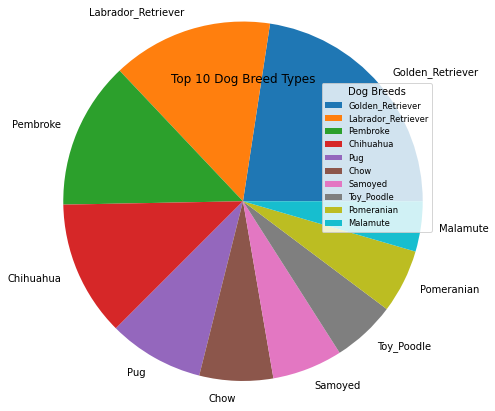

In [90]:
#Visualise top 10 types of dog breeds
label=totals[0:10].index
plt.pie( totals[0:10],labels=label, radius=2.0, frame=False)
plt.legend(label, borderaxespad=0, title='Dog Breeds', fontsize='small', bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.title('Top 10 Dog Breed Types', loc='center')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
plt.show()

In [91]:
plt.savefig('pie.png')

<Figure size 432x288 with 0 Axes>

#### Comment: It is clearly depicted from the pie chart that Golden Retriever dog type is the most common breed

### 3. Is there a correlation between a post's rating and the number of retweets?

Text(0, 0.5, 'Retweets')

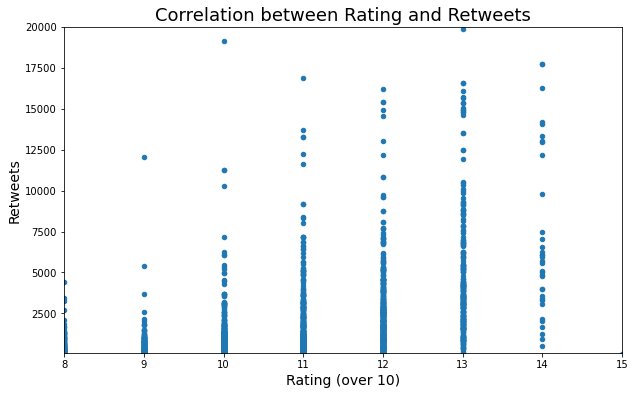

In [92]:
combo_df.plot(x = "rating_numerator", y = "retweet_count", kind ='scatter', figsize=(10,6))
plt.title('Correlation between Rating and Retweets', fontsize=18)
plt.xlim([8,15])
plt.ylim([100,20000])
plt.xlabel('Rating (over 10)', fontsize=14)
plt.ylabel('Retweets', fontsize=14)

In [93]:
from scipy.stats import pearsonr
pearsonr(combo_df.rating_numerator , combo_df.retweet_count)

(0.017699511853903914, 0.4224799973323276)

#### Comments:
1. The above scatter diagram shows there's no correlation between the rating on a dog post and the number of retweets it received.

2. The low pearson correlation coefficient of 0.017 supports the point that there is no linear relationship between the ratings variable and the retweets variable.

### 4. Which dog cycle stage collectively amassed the highest average number of likes on their posts?

In [94]:
combo_df.groupby('cycles')['fav_count'].mean().sort_values(ascending=False)

cycles
puppo         18605.000000
doggo         16676.230769
multicycle    12625.153846
floofer       11149.714286
None           7019.345026
pupper         5987.449761
Name: fav_count, dtype: float64

#### Comment: 
The puppo dog stage amassed the highest average number of likes on the posts with over 18k likes while the pupper dog stage received the fewest average number of likes collectively with 5.9k

### Resources used:
    1. github 2. stackoverflow 3. w3schools.com